## Figures for Network model of Latent Recurrent Discharge (LRD)

### Some imports and settings

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings

import brian2.numpy_ as np
import matplotlib.pyplot as plt

from settings import COLOR, G_GABA_LIST, TAU_KCC2_LIST, constants, logging, time_unit

# start from defaults before loading stylesheet
plt.style.use("default")
plt.style.use("style/article.mplstyle")

# suppress warnings
np.seterr(all="ignore")
warnings.filterwarnings("ignore")

logger = logging.getLogger("lrd")

SAVE_FIGS = False
file_formats = ["jpg"]
save_args = dict(use_args=True, close=False, file_formats=file_formats)

### Base Figure

In [ ]:
from core.sim import single_run
# net, results = single_run()

# Explain figure

In [ ]:
from scripts.lrdfigure_explain import Explain

np.random.seed(1337)

explain = Explain()
ehco3 = -18
phco3 = 0.2
pcl = 1 - phco3
mv_step = 2
time_per_value = 60
egaba = [-74, -40]
diff = egaba[1] - egaba[0]
values = diff // mv_step
steps = values - 1
duration = values * time_per_value
ecl = [round((e - phco3 * ehco3) / pcl, 2) for e in egaba]
# [-74, -40] -> 34 dif /2 -> 17 values -1 -> 16 steps -> 100 s per value -> 1600 s
explain.run(
    duration=duration,
    num_ecl_steps=steps,
    E_Cl_0=ecl[0],
    E_Cl_end=ecl[1],
)
explain.plot()
if SAVE_FIGS:
    explain.save_figure(**save_args)
del explain


# Alter conductances

1. Emulate picrotoxin (pink) by **reducing** $g_{GABA_{max}}$.
2. Emulate benzodiazepines (green) by **increasing** $g_{GABA_{max}}$.

We can see the effect of benzodiazepines depends on $E_{GABA}$.

2023-05-08 10:53:39 [    INFO] loaded ['drug', 'E_Cl_0', '$g_{AMPA_{max}}$', 'run_idx', 'var'] ((600000, 288)) from cache temp/7c8ee97115e47a549923da41b201d144.h5 (core.lrdfigure::lrdfigure.py::415)
2023-05-08 10:53:39 [    INFO] plotting                                                                                   (scripts.lrdfigure_drugs::lrdfigure_drugs.py::72)
2023-05-08 10:53:39 [    INFO] drug = 0 	 ecl = -88.0                                                                     (scripts.lrdfigure_drugs::lrdfigure_drugs.py::211)
2023-05-08 10:53:39 [    INFO] drug = 0.25 	 ecl = -88.0                                                                  (scripts.lrdfigure_drugs::lrdfigure_drugs.py::211)
2023-05-08 10:53:39 [    INFO] drug = 0.5 	 ecl = -88.0                                                                   (scripts.lrdfigure_drugs::lrdfigure_drugs.py::211)
2023-05-08 10:53:39 [    INFO] drug = 1 	 ecl = -88.0                                                         

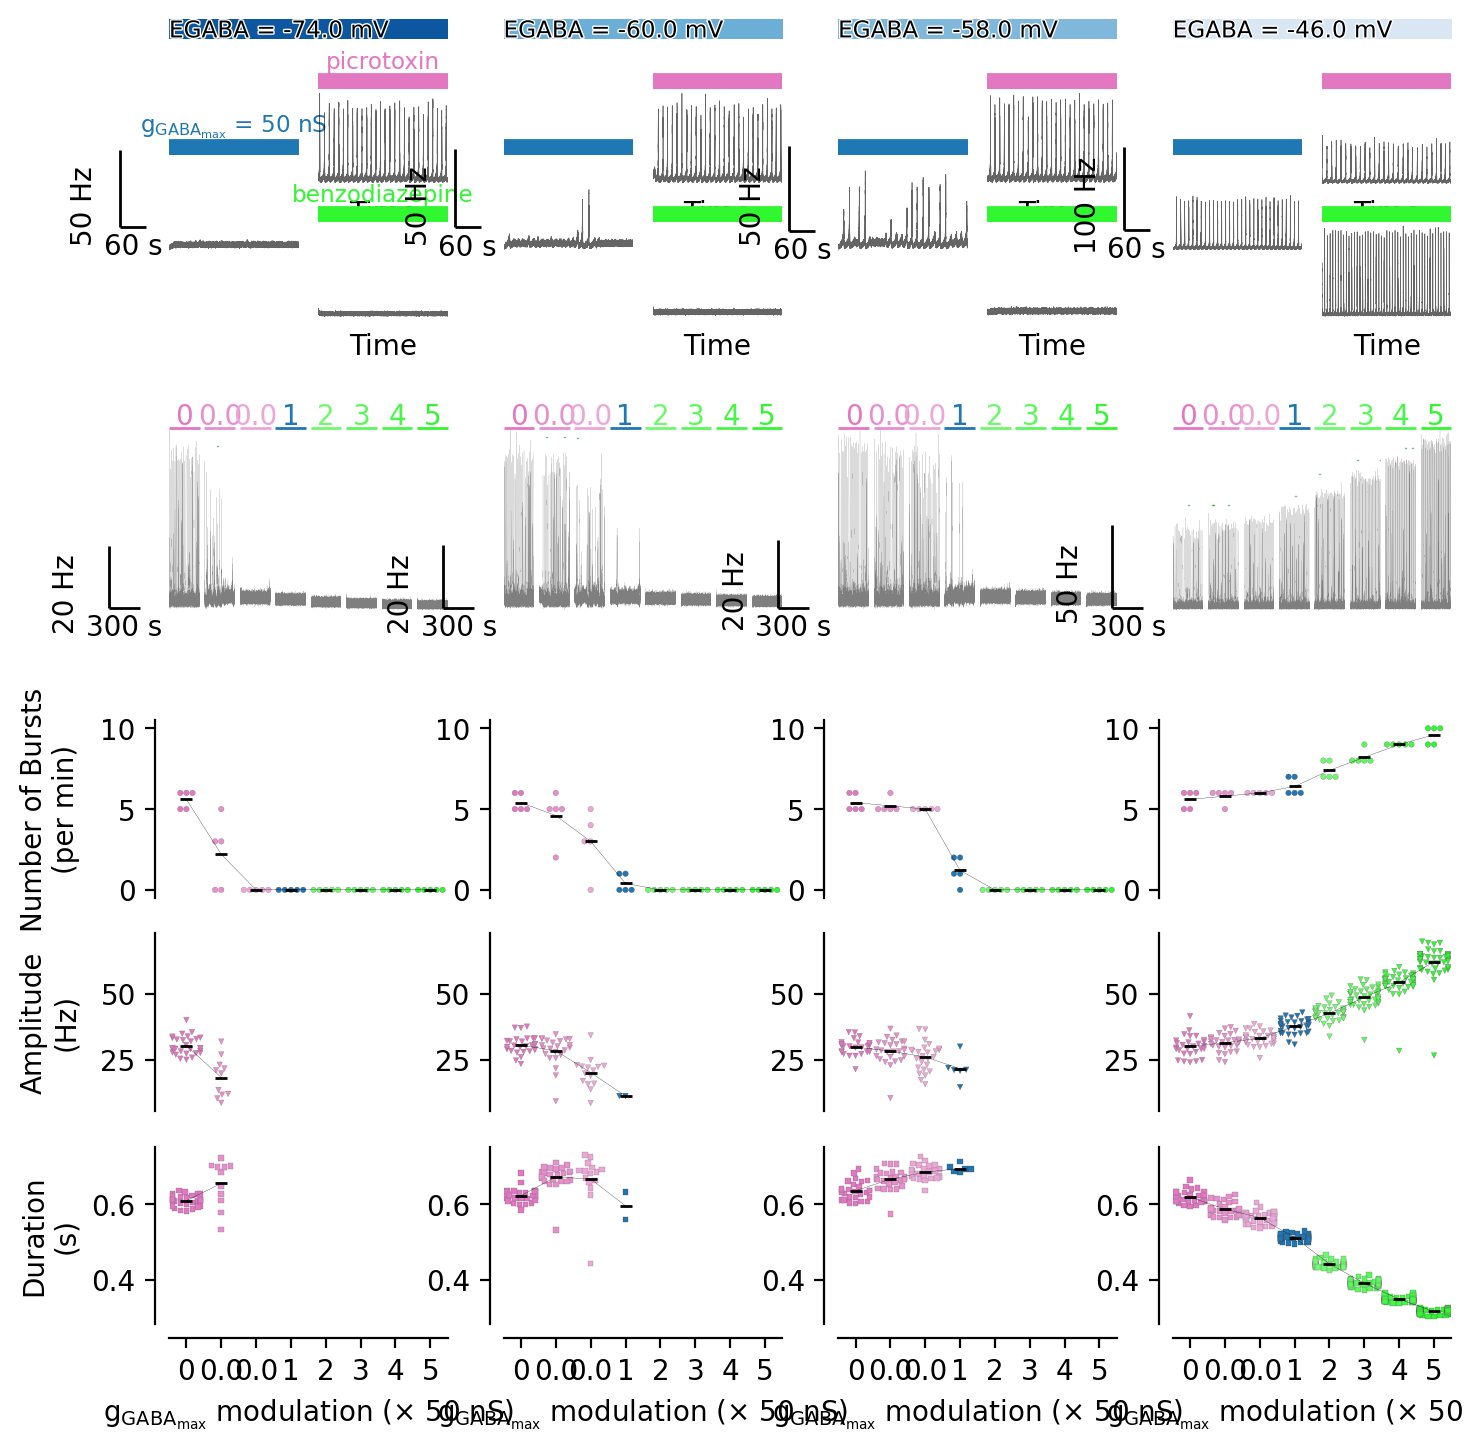

In [3]:
from scripts.lrdfigure_drugs import Drugs

ehco3 = -18
phco3 = 0.2
pcl = 1 - phco3
egabas = [-74, -60, -58, -46]
E_Cl_0s = [round((e - phco3 * ehco3) / pcl, 2) for e in egabas]
drugs = Drugs(benzo_strengths=(0, 0.25, 0.5, 1, 2, 3, 4, 5), E_Cl_0s=E_Cl_0s)
drugs.run()
drugs.plot()
if SAVE_FIGS:
    drugs.save_figure(**save_args)

## Start having dynamic chloride $Cl^-$

We compared networks with either hyperpolarised ($E_{Cl^-} = -88 mV \approx E_{GABA} = -74 mV$) or depolarised ($E_{Cl^-} = -60 mV \approx E_{GABA} = -51.6 mV$) EGABA.

The starting $E_{GABA}$ seems to have neglible, if any effect.

We further consider the effect of GABA conductance $g_{GABA_{max}}$ (brightness, rows) along with different $\tau_{KCC2}$ values (hue, traces).

2023-05-07 23:51:23 [    INFO] loaded ['$g_{GABA_{max}}$', '$\it{\tau}_{\rm{KCC2}}$', '$ECl\it{^-} _0$', 'run_idx', 'var'] ((600000, 960)) from cache temp/80681d4bfa953ccdcccf6adf7e8ae637.h5 (core.lrdfigure::lrdfigure.py::415)
2023-05-07 23:51:23 [    INFO] plotting                                                                                   (scripts.lrdfigure_chloride::lrdfigure_chloride.py::74)
2023-05-07 23:51:28 [    INFO] took 5.18s to plot                                                                         (scripts.lrdfigure_chloride::lrdfigure_chloride.py::578)


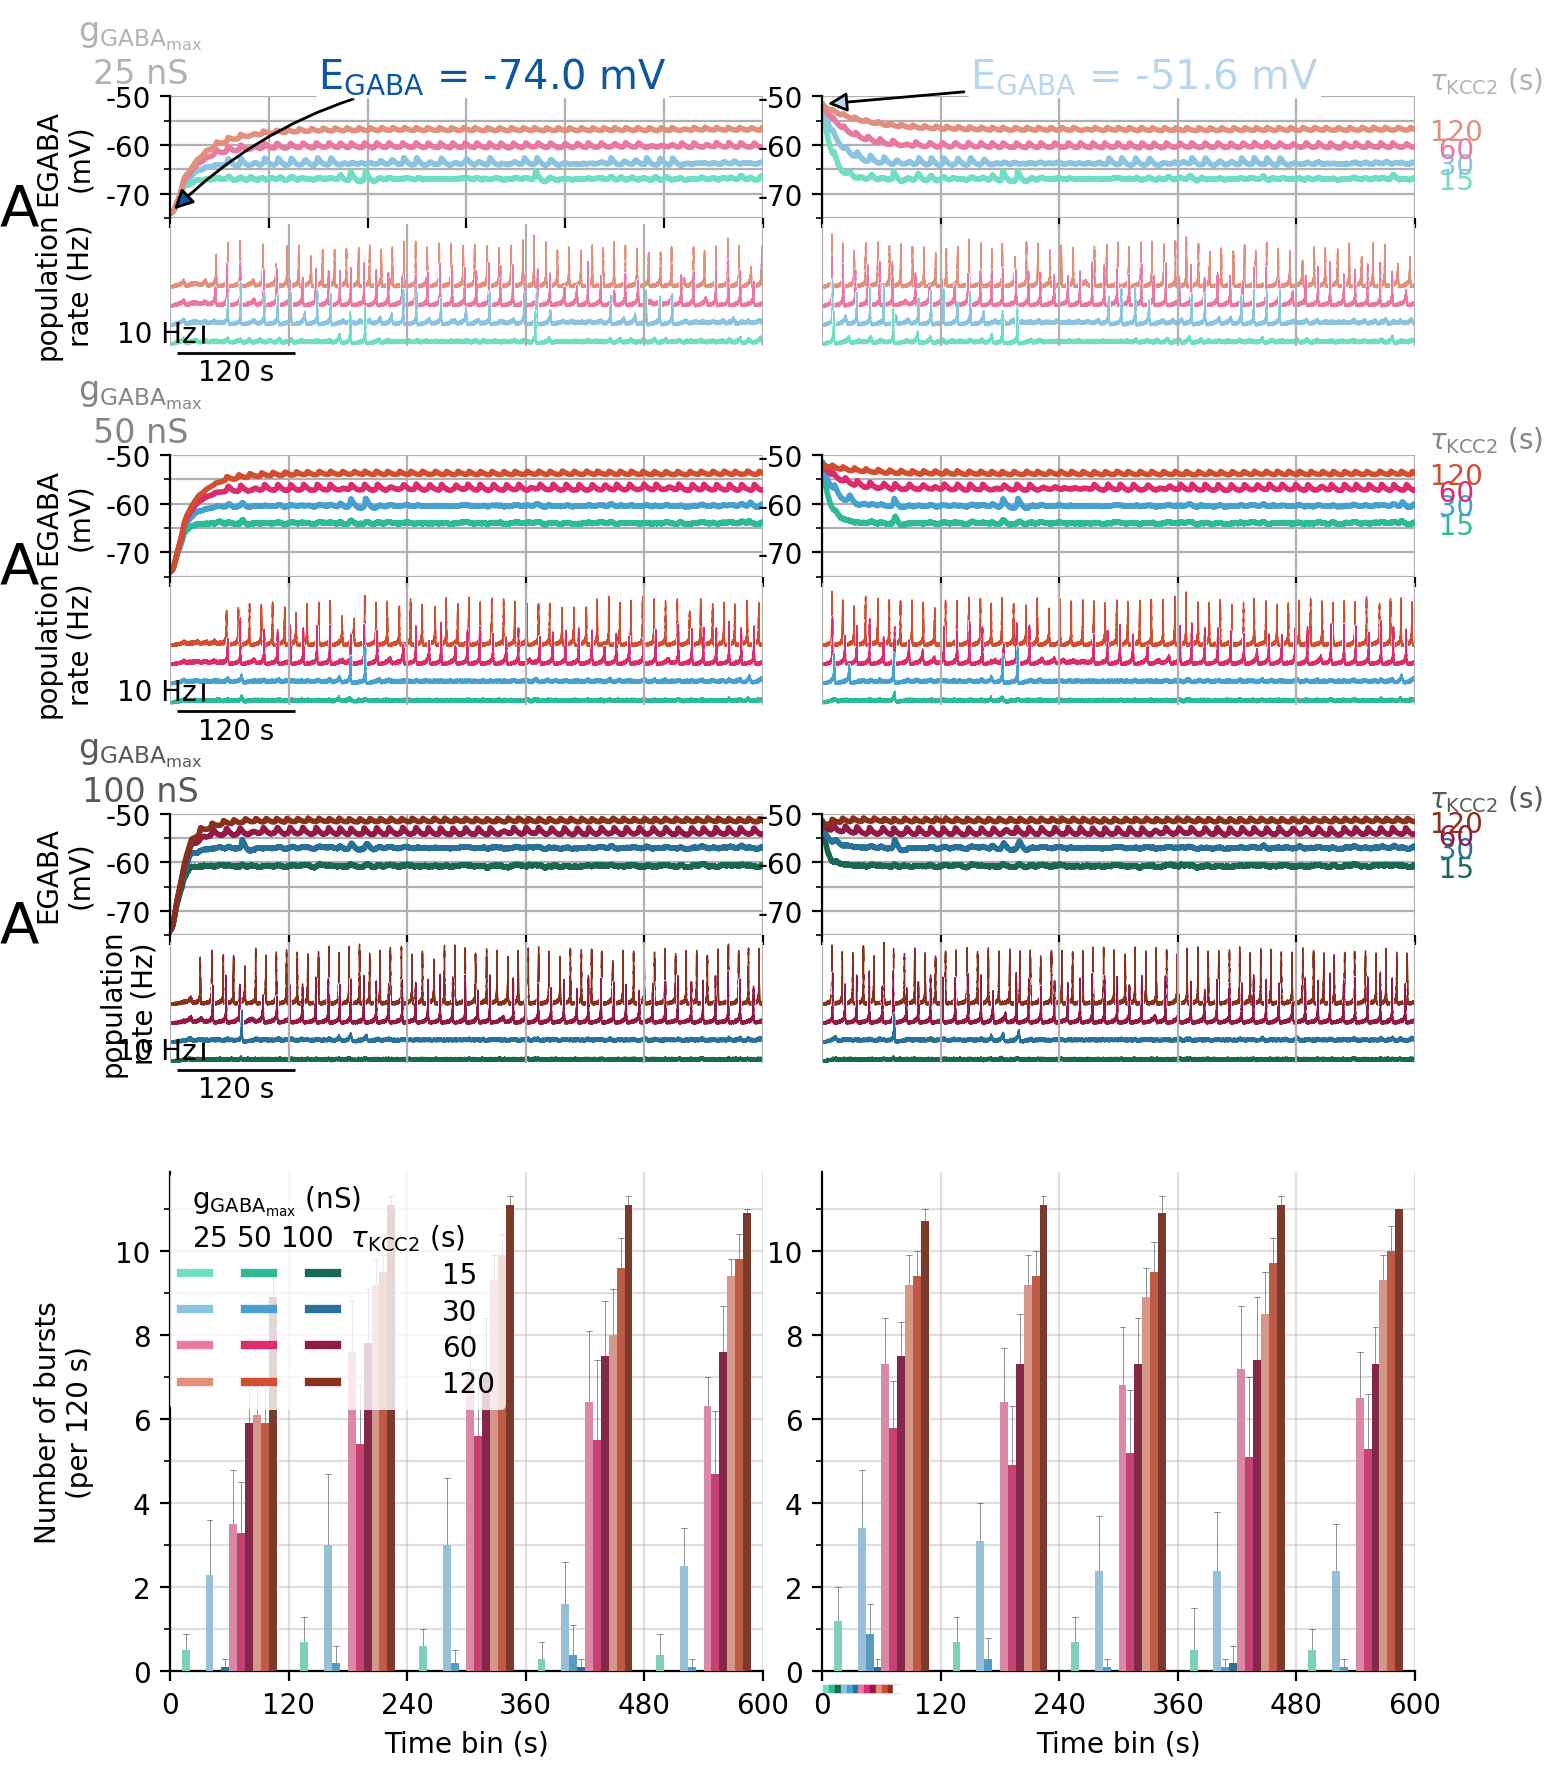

In [32]:
from scripts.lrdfigure_chloride import Chloride

cl = Chloride(
    tau_KCC2s=TAU_KCC2_LIST[::2][:-1],
    E_Cl_0s=(-60, -88),
    g_GABAs=(50, 25, 100),
    seeds=(None, 1038, 1337, 1111, 1010, 1011, 1101, 1110, 11110, 111100),
)
cl.run(duration=600)
cl.plot(timeit=True, colorbar=False)
if SAVE_FIGS:
    cl.save_figure(**save_args)
del cl

### Supplementary work: the effect of neuron size ($L$) and chloride extrusion ($\tau_{KCC2}$) on the number of bursts in a network

2023-05-08 16:38:19 [    INFO] loaded ['$g_{GABA_{max}}$', '$\it{\tau}_{\rm{KCC2}}$', '$ECl\it{^-} _0$', 'Length', 'run_idx', 'var'] ((600000, 720)) from cache temp/7a86661d8d70eca9143665f09423b854.h5 (core.lrdfigure::lrdfigure.py::415)
2023-05-08 16:38:19 [    INFO] plotting                                                                                   (scripts.lrdfigure_chloride_length::lrdfigure_chloride_length.py::80)


KeyboardInterrupt: 

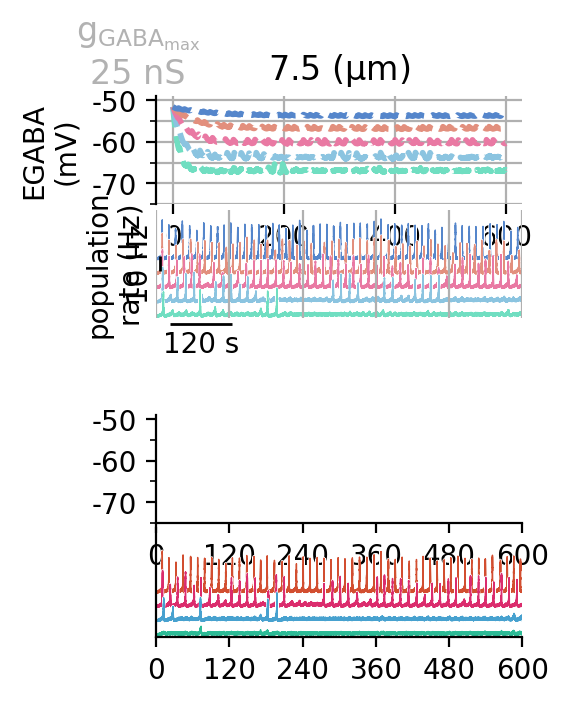

In [298]:
from scripts.lrdfigure_chloride_length import ChlorideLength

cl = ChlorideLength(
        g_GABAs=(50, 25, 100),
        seeds=(
            None,
            1038,
            1337,
            1111,
        ),
    )

cl.run(duration=600)
cl.plot(timeit=True, colorbar=False)
if SAVE_FIGS:
    cl.save_figure(**save_args)

# Explore time constants of "Excitatory" and "Inhibitory" KCC2

$\tau_{KCC2_{exc}}$ = [15, 21, 30, 42, 60, 84, 120, 169, 240]

$\tau_{KCC2_{inh}}$ = [15, 21, 30, 42, 60, 84, 120, 169, 240]

2023-05-08 15:17:40 [    INFO] loaded ['$g_{GABA_{max}}$', '$\it{\tau}_{\rm{KCC2_{PC}}}$', '$\it{\tau}_{\rm{KCC2_{IN}}}$', 'run_idx', 'var'] ((60000, 9720)) from cache temp/b3dbba59324b674a3e92e83406b80363.h5 (core.lrdfigure::lrdfigure.py::415)
2023-05-08 15:17:40 [    INFO] plotting                                                                                   (scripts.lrdfigure_tau::lrdfigure_tau.py::106)
2023-05-08 15:18:13 [    INFO] took 32.65s to plot                                                                        (scripts.lrdfigure_tau::lrdfigure_tau.py::649)


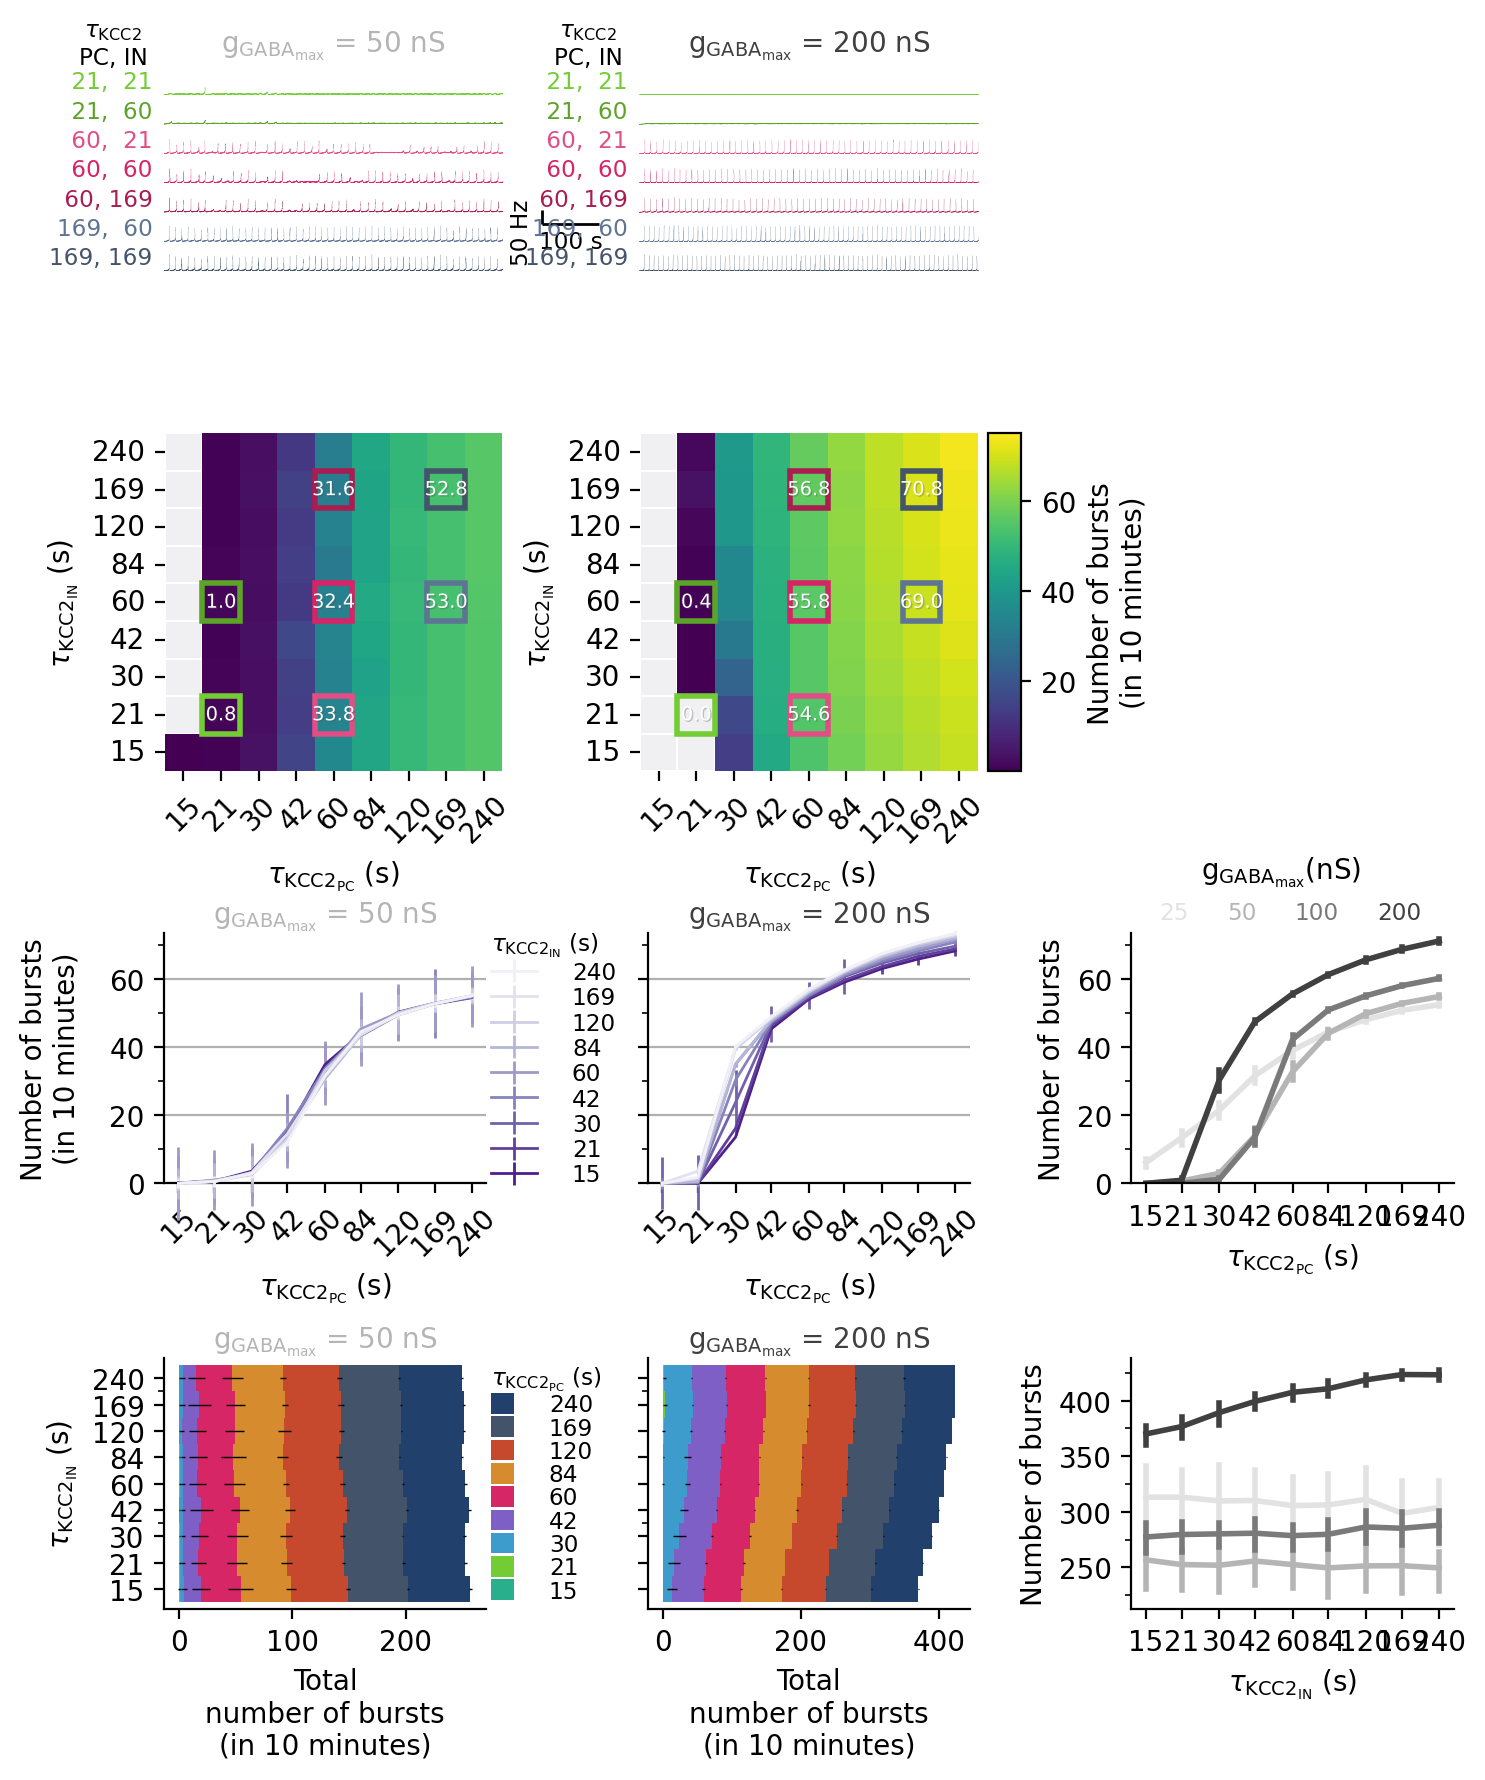

In [203]:
from scripts.lrdfigure_tau import Tau

tau = Tau(
    tau_KCC2_E_list=TAU_KCC2_LIST,
    tau_KCC2_I_list=TAU_KCC2_LIST,
    g_GABA_list=G_GABA_LIST,
    seeds=(
        None,
        1038,
        1337,
        1111,
        1010,
    ),
)

tau.run(duration=600, nrn_idx_i=[0, 1, 2, 3])
_, g = tau.plot(plot_g_GABA_list=[50, 200])
if SAVE_FIGS:
    tau.save_figure(**save_args)

### Supplementary plots of $\tau_{KCC2_{IN}}$ and $\tau_{KCC2_{PC}}$

In [207]:
df_num_bursts = (
    g.groupby(
        ["g_GABA", "KCC2 E", "KCC2 I", "run_idx"],
        as_index=False,
    )
    .count()
    .rename(columns={"Burst start time (s)": "Number of bursts"})
)
df_num_bursts[constants.TAU_KCC2_I] = df_num_bursts["KCC2 I"].astype(
    int
)
df_num_bursts[constants.TAU_KCC2_E] = df_num_bursts["KCC2 E"].astype(
    int
)
df_num_bursts

,g_GABA,KCC2 E,KCC2 I,run_idx,Number of bursts,Burst end time (s),$\it{\tau}_{\rm{KCC2_{IN}}}$,$\it{\tau}_{\rm{KCC2_{PC}}}$
0,25.0,15.0,15.0,0.0,6,6,15,15
1,25.0,15.0,15.0,1.0,18,18,15,15
2,25.0,15.0,15.0,2.0,8,8,15,15
3,25.0,15.0,15.0,3.0,0,0,15,15
4,25.0,15.0,15.0,4.0,5,5,15,15
...,...,...,...,...,...,...,...,...
1615,200.0,240.0,240.0,0.0,74,74,240,240
1616,200.0,240.0,240.0,1.0,74,74,240,240
1617,200.0,240.0,240.0,2.0,74,74,240,240
1618,200.0,240.0,240.0,3.0,73,73,240,240


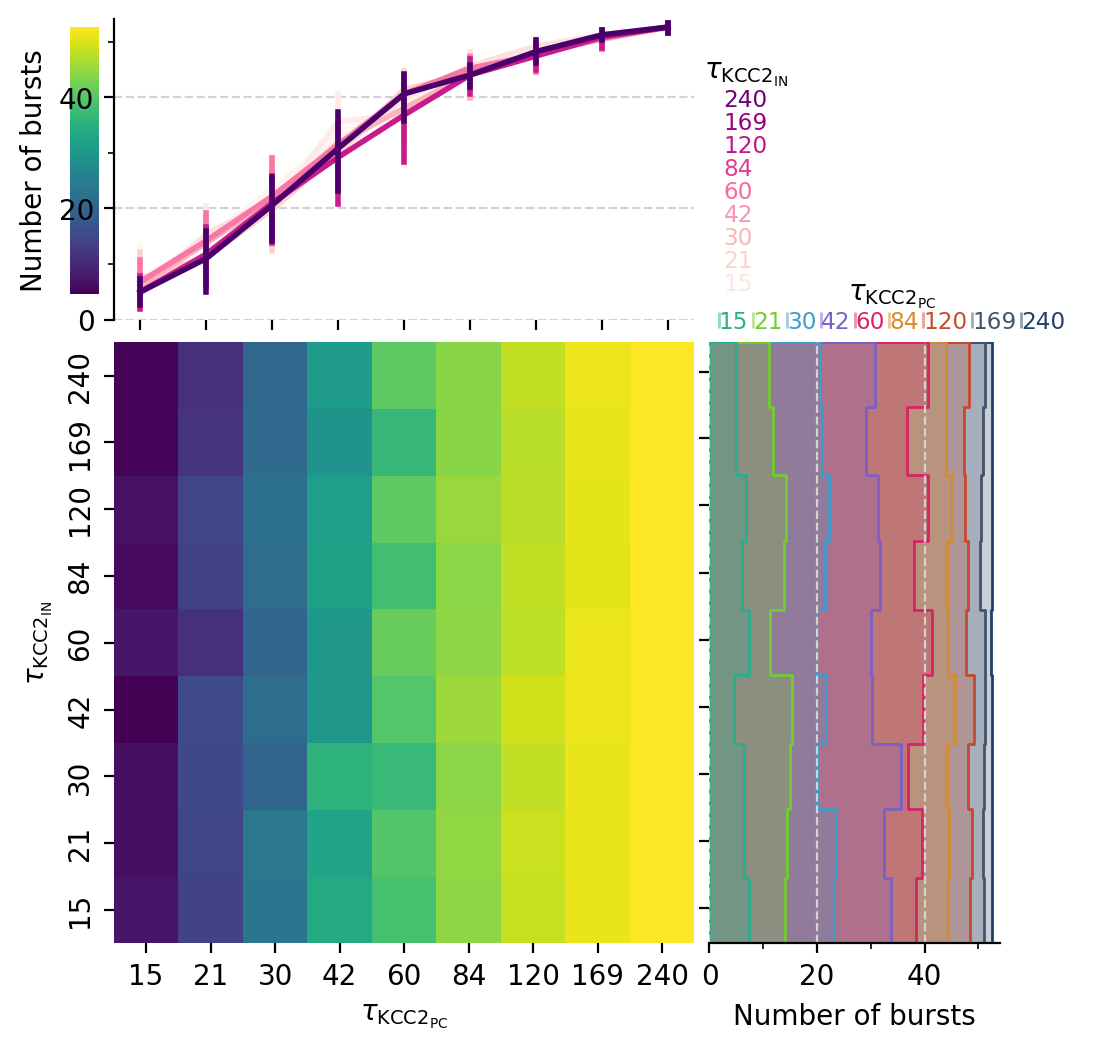

In [289]:
from matplotlib.ticker import MaxNLocator
import seaborn as sns

g_gaba = 25
df = df_num_bursts[df_num_bursts["g_GABA"] == g_gaba]

fig, axes = plt.subplot_mosaic(
    [["heatmap_cbar", "tau_KCC2_E", "."], [".", "heatmap", "tau_KCC2_I"]],
    gridspec_kw={
        "height_ratios": [0.5, 1],
        "width_ratios": [0.05, 1, 0.5],
        "wspace": 0.05,
        "hspace": 0.05,
    },
    figsize=(6,6)
)


df[f"{constants.TAU_KCC2_E} (s)"] = df[constants.TAU_KCC2_E].apply(lambda x: f"{x:.0f}")
df[constants.TAU_KCC2_E] = df[constants.TAU_KCC2_E].astype(int).astype("category")
df[constants.TAU_KCC2_I] = df[constants.TAU_KCC2_I].astype(int).astype("category")


mean_num_bursts = (
    df.groupby(
        ["g_GABA", constants.TAU_KCC2_E, constants.TAU_KCC2_I],
    )["Number of bursts"]
    .agg(["count", "sum", "mean", "std"])
    .reset_index()
    .rename(
        columns={
            "mean": "Number of bursts",
        }
    )
)

square_df = mean_num_bursts.pivot(
    index=constants.TAU_KCC2_I,
    columns=constants.TAU_KCC2_E,
    values="Number of bursts",
)[::-1]
sns.heatmap(
    square_df,
    ax=axes["heatmap"],
    cbar_ax=axes["heatmap_cbar"],
    # cbar_kws={"orientation": "horizontal"},
    cmap="viridis",
    # mask=square_df == 0,
    annot=False,
    fmt=".1f",
    annot_kws={"fontsize": 8},
)

# lineplot for tau_KCC2_E
df[constants.TAU_KCC2_I] = df[constants.TAU_KCC2_I].astype(int)
tau_i = sorted(df[constants.TAU_KCC2_I].unique())

sns.lineplot(
    data=df,
    x=f"{constants.TAU_KCC2_E} (s)",
    y="Number of bursts",
    hue=constants.TAU_KCC2_I,
    hue_order=tau_i,
    palette="RdPu",
    ax=axes["tau_KCC2_E"],
    legend=True,
    err_style="bars",
)
axes["tau_KCC2_E"].set_ylim(0, df["Number of bursts"].max())
axes["tau_KCC2_I"].set_xlim(0, df["Number of bursts"].max())
axes["heatmap_cbar"].set_ylim(0, df["Number of bursts"].max())


ratio = tau_i[1] / tau_i[0]
bins = np.append(tau_i, df[constants.TAU_KCC2_I].max() * ratio)
sns.histplot(
    data=df.groupby([constants.TAU_KCC2_I, constants.TAU_KCC2_E]).mean(
        numeric_only=True
    ),
    y=constants.TAU_KCC2_I,
    weights="Number of bursts",
    stat="count",
    hue=constants.TAU_KCC2_E,
    hue_order=sorted(df[constants.TAU_KCC2_E].unique()),
    palette=COLOR.TAU_PAL,
    multiple="layer",
    element="step",
    bins=bins,
    ax=axes["tau_KCC2_I"],
)
# set x scale to log 2
axes["tau_KCC2_I"].set_yscale("log", base=ratio)
axes["tau_KCC2_I"].set_yticks(df[constants.TAU_KCC2_I].unique() + np.diff(bins) / 2)
axes["tau_KCC2_I"].set_yticklabels(df[constants.TAU_KCC2_I].unique())
axes["tau_KCC2_I"].set_ylim(bins[0], bins[-1])

sns.despine(ax=axes["tau_KCC2_E"], bottom=True)
axes["tau_KCC2_E"].set(xlabel="")
axes["tau_KCC2_E"].tick_params(
    axis="x", which="both", bottom=True, top=False, labelbottom=False
)
axes["tau_KCC2_E"].set_yticks(np.arange(0, df["Number of bursts"].max() + 1, 20))
axes["tau_KCC2_E"].set_yticks(np.arange(0, df["Number of bursts"].max() + 1, 10), minor=True)
axes["tau_KCC2_E"].grid(axis='y', which="major", color="lightgrey", linestyle="--", zorder=-1)

sns.despine(ax=axes["tau_KCC2_I"], left=True)
axes["tau_KCC2_I"].set(ylabel="", xlabel="Number of bursts")
axes["tau_KCC2_I"].tick_params(axis="y", which="both", left=True, labelleft=False)
axes["tau_KCC2_I"].set_xticks(np.arange(0, df["Number of bursts"].max() + 1, 20))
axes["tau_KCC2_I"].set_xticks(np.arange(0, df["Number of bursts"].max() + 1, 10), minor=True)
axes["tau_KCC2_I"].grid(axis="x", which="major", color="lightgrey", linestyle="--", zorder=-99)

sns.despine(ax=axes["heatmap_cbar"], left=True, bottom=True)
axes["heatmap_cbar"].tick_params(
    axis="y", which="both", left=False, right=False, labelleft=False, labelright=False
)
# LEGEND
handles = [
    plt.Rectangle(
        (0, 0),
        1, 1,
        fill=True,
        color=COLOR.TAU_PAL_DICT[i], alpha=0.5,
        edgecolor=COLOR.TAU_PAL_DICT[i],
    )
    for i in sorted(df[constants.TAU_KCC2_E].unique())
]

axes["tau_KCC2_I"].legend(
    handles,
    sorted(df[constants.TAU_KCC2_E].unique(), reverse=False),
    loc=(0, 1),
    ncol=len(df[constants.TAU_KCC2_E].unique()),
    handletextpad=0,
    handlelength=0,
    columnspacing=0.2,
    labelspacing=0,
    labelcolor=COLOR.TAU_PAL,
    fontsize="x-small",
    title=constants.TAU_KCC2_E,
    title_fontsize="small",
    frameon=False,
)
axes["tau_KCC2_E"].legend(
    tau_i[::-1],
    loc=(1, 0.05),
    handletextpad=0,
    handlelength=0,
    columnspacing=0.2,
    labelspacing=0,
    labelcolor=sns.color_palette("RdPu_r", len(tau_i)),
    fontsize="x-small",
    title=constants.TAU_KCC2_I,
    title_fontsize="small",
    frameon=False,
)

## $g_{GABA_{max}}$ vs $\tau_{KCC2}$ with $E_{GABA}$

First, plot number of bursts as a function of $g_{GABA_{max}}$ as we directly vary $E_{GABA}$ (static $Cl^-$).

Next, plot number of bursts and $E_{GABA}$ as a function of $g_{GABA_{max}}$ and $\tau_{KCC2}$. 

Finally, plot the relationship between the pre-burst GABAergic current ($I_{GABA}$) and the number of bursts. The $g_{GABA_{max}}$ and $\tau_{KCC2}$ are displayed for reference as color and marker size, respectively. Squares are from static simulations.

2023-05-08 16:19:12 [    INFO] PART 1
********************                                                                (scripts.lrdfigure_ggaba_e::lrdfigure_ggaba_e.py::72)
2023-05-08 16:19:15 [    INFO] loaded ['$g_{GABA_{max}}$', 'run_idx', 'var'] ((1020000, 513)) from cache temp/d767110552a847c6eb428137ac61ca2e.h5 (core.lrdfigure::lrdfigure.py::415)
2023-05-08 16:19:15 [    INFO] PART 2 
********************                                                               (scripts.lrdfigure_ggaba_e::lrdfigure_ggaba_e.py::104)
2023-05-08 16:19:16 [    INFO] loaded ['Time', 'E_GABA_E', 'E_GABA_I', 'E_GABA_all', 'I_GABA_E', 'I_GABA_I', 'I_GABA_all', 'g_GABA_E', 'g_GABA_I', 'r_all', '$g_{GABA_{max}}$', '$\\it{\\tau}_{\\rm{KCC2}}$', 'run_idx'] from cache temp/9d540d476956cf1bc4860f4289f2b52e.hdf5 (core.lrdfigure::lrdfigure.py::411)
2023-05-08 16:21:18 [    INFO] plotting                                                                                   (scripts.lrdfigure_ggaba_e::lrdfigur

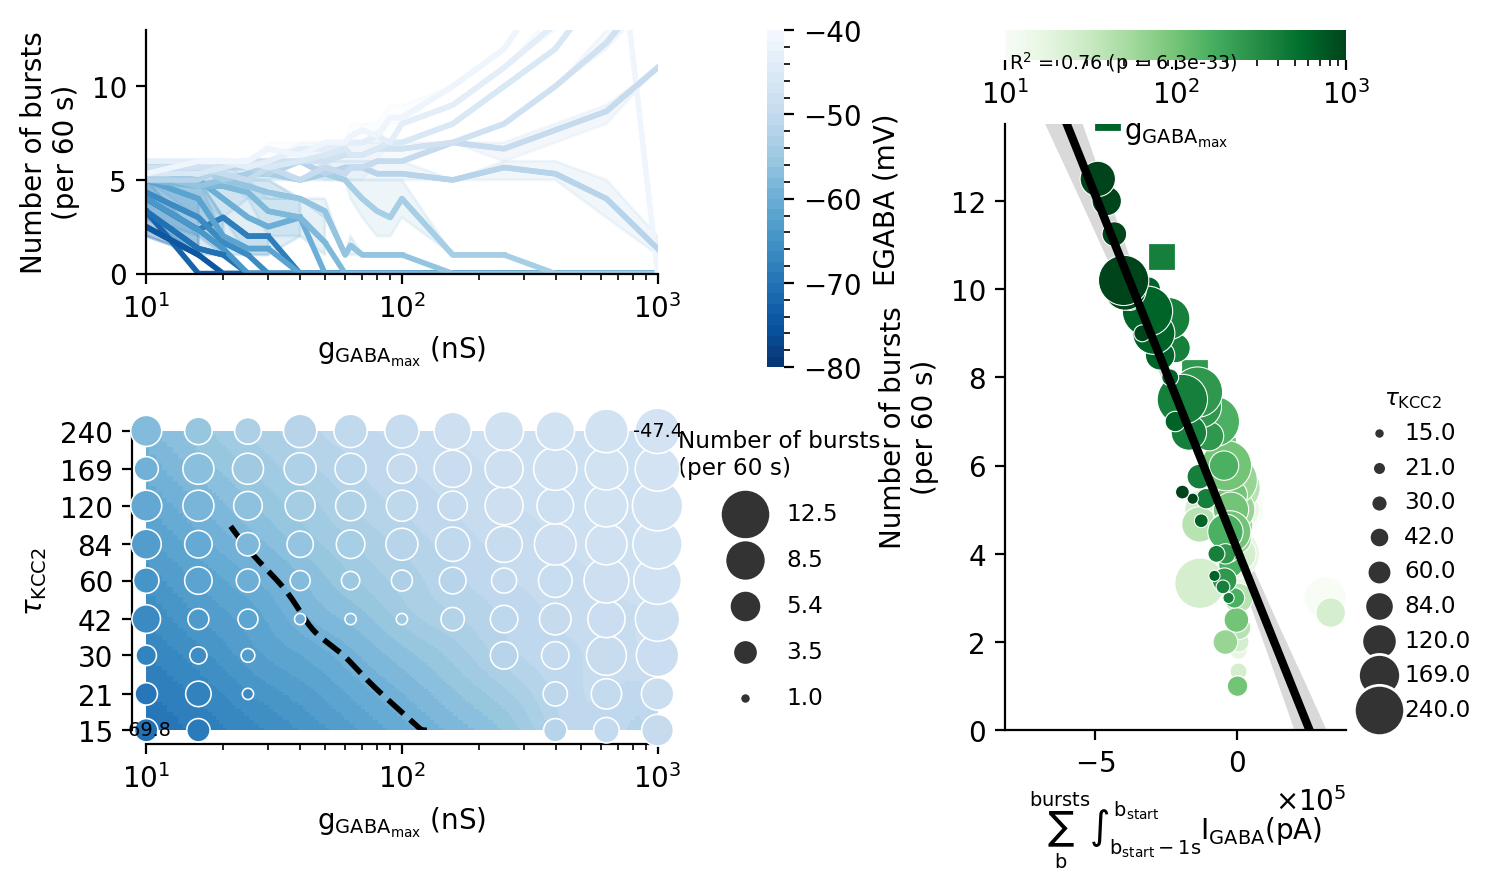

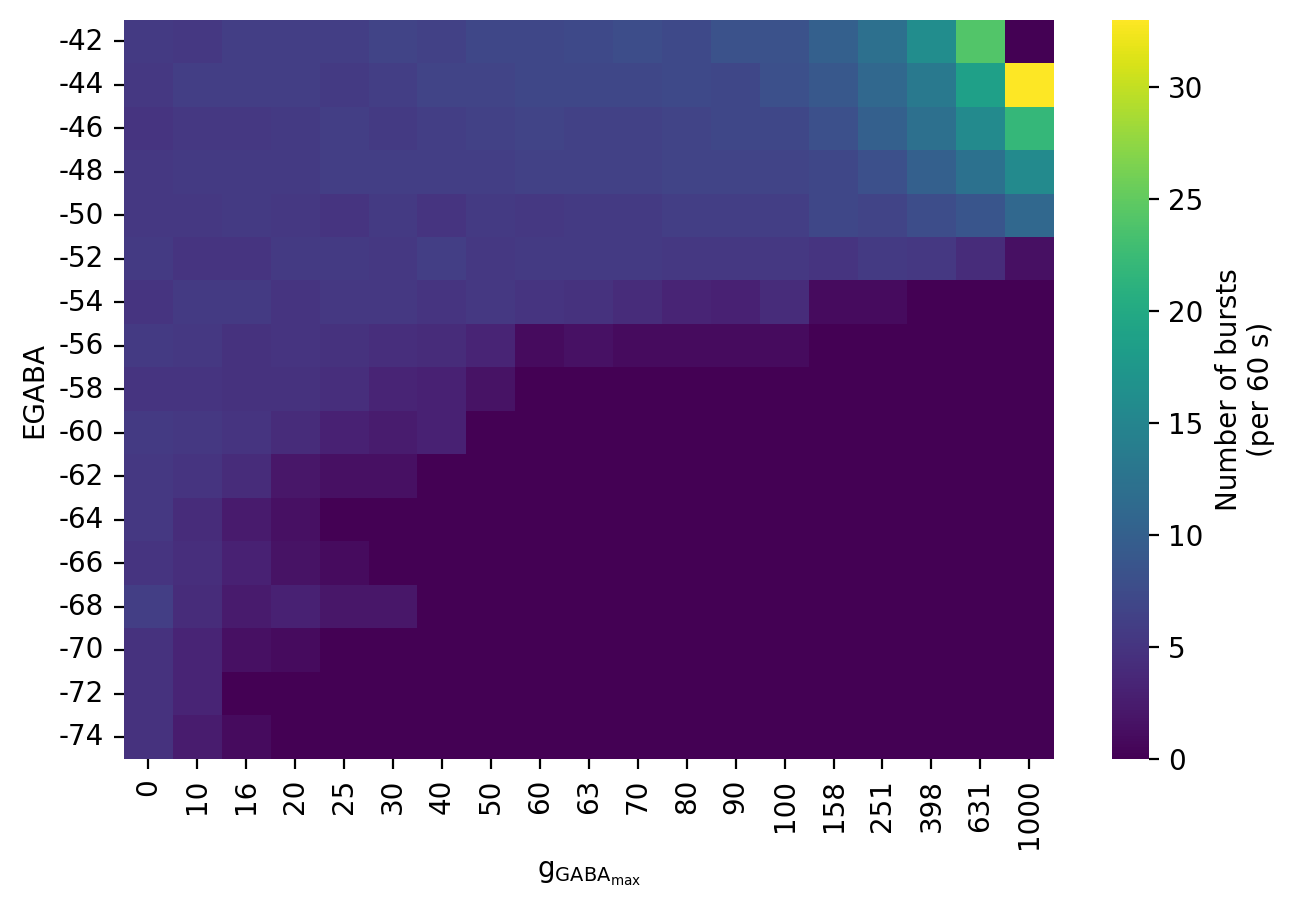

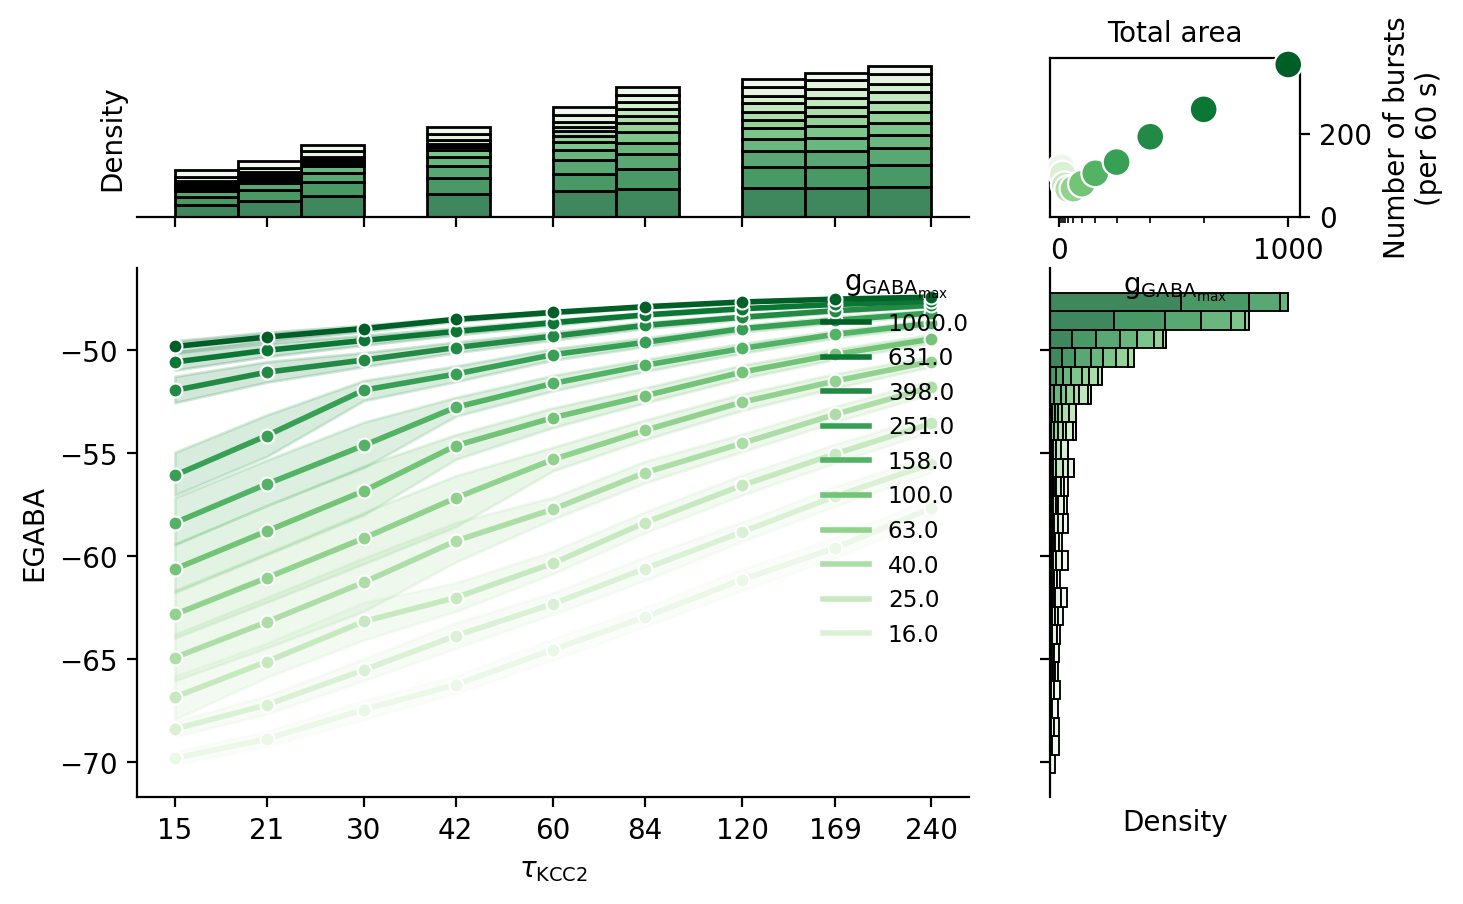

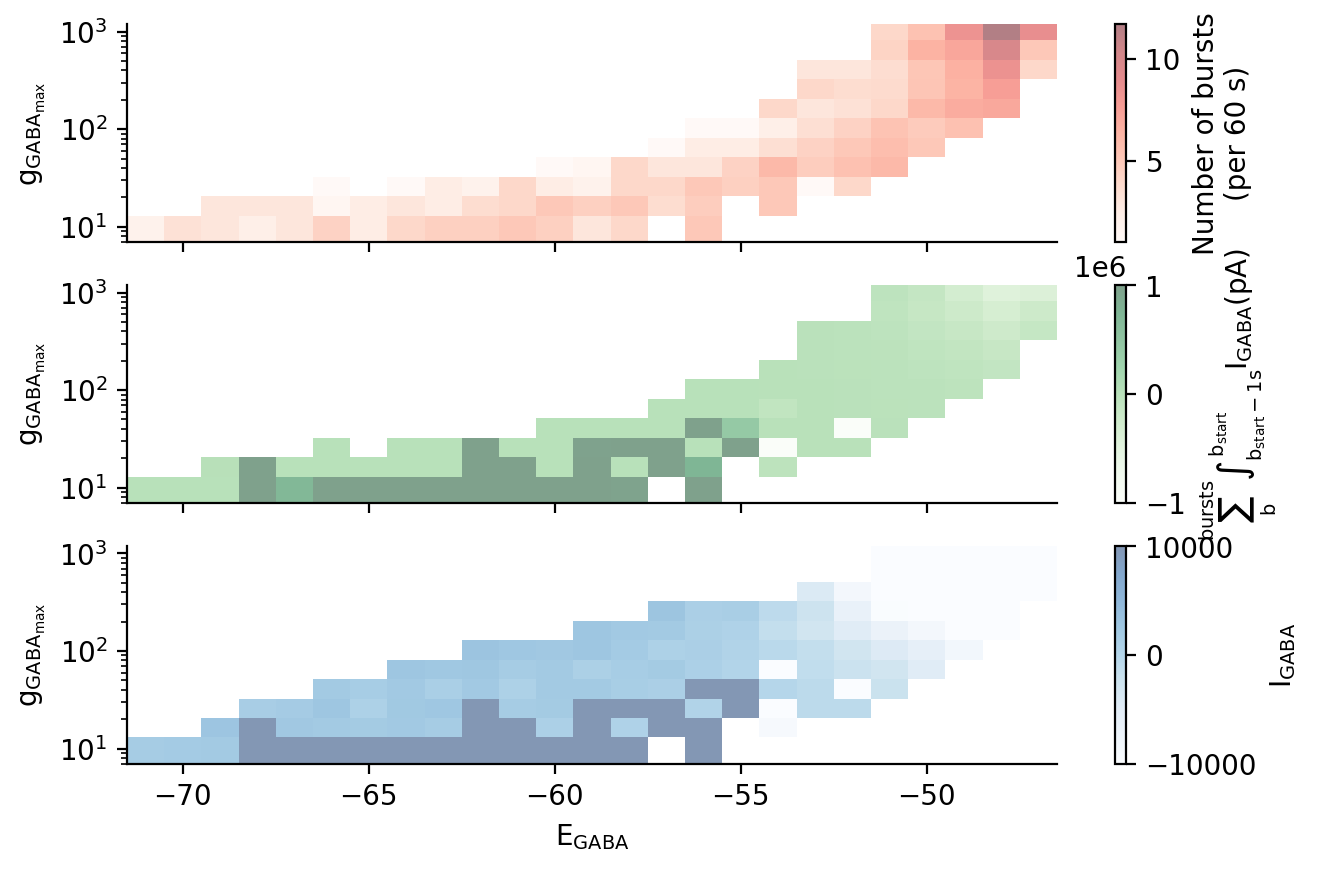

In [294]:
from scripts.lrdfigure_ggaba_e import Gve

gve = Gve(
    seeds=(None, 1234, 5678),
    gGABAsvEGABA=sorted(
        set(
            np.append(
                np.round(np.arange(0, 100.0001, 10), 0),
                np.geomspace(10, 1000, 11).round(0),
            )
        )
    ),
    gGABAs=np.geomspace(10, 1000, 11).round(0),
    tau_KCC2s=TAU_KCC2_LIST,
)
gve.run()
gve.process()
gve.plot(egabas=5)
if SAVE_FIGS:
    gve.save_figure(**save_args)

## Supplementary: investigate how excitatory parameters affect the number of bursts.

Specifically, we vary:
1. $g_{AMPA_{max}}$
2. $g_{NMDA_{max}}$

And run static $Cl^-$ simulations at hyperpolarised (blue), close to $V_{rest}$ (purple), and depolarised (red) EGABA values.

2023-05-08 16:17:13 [    INFO] loaded ['$g_{GABA_{max}}$', '$g_{AMPA_{max}}$', '$g_{NMDA_{max}}$', 'run_idx', 'var'] ((1020000, 972)) from cache temp/23b3488f4179accceef86f2e62b4eebd.h5 (core.lrdfigure::lrdfigure.py::415)
processing bursts: 100%|██████████| 108/108 [00:26<00:00,  4.12it/s]
2023-05-08 16:17:39 [    INFO] plotting                                                                                   (scripts.lrdfigure_gampa::lrdfigure_gampa.py::193)
2023-05-08 16:17:40 [    INFO] plotting rate example                                                                      (scripts.lrdfigure_gampa::lrdfigure_gampa.py::207)
2023-05-08 16:17:48 [    INFO] saving figures                                                                             (core.lrdfigure::lrdfigure.py::241)
2023-05-08 16:17:49 [    INFO] saving to output/rates_example.pdf                                                         (plot_save::figure.py::64)
2023-05-08 16:18:43 [    INFO] Saved figures [2]        

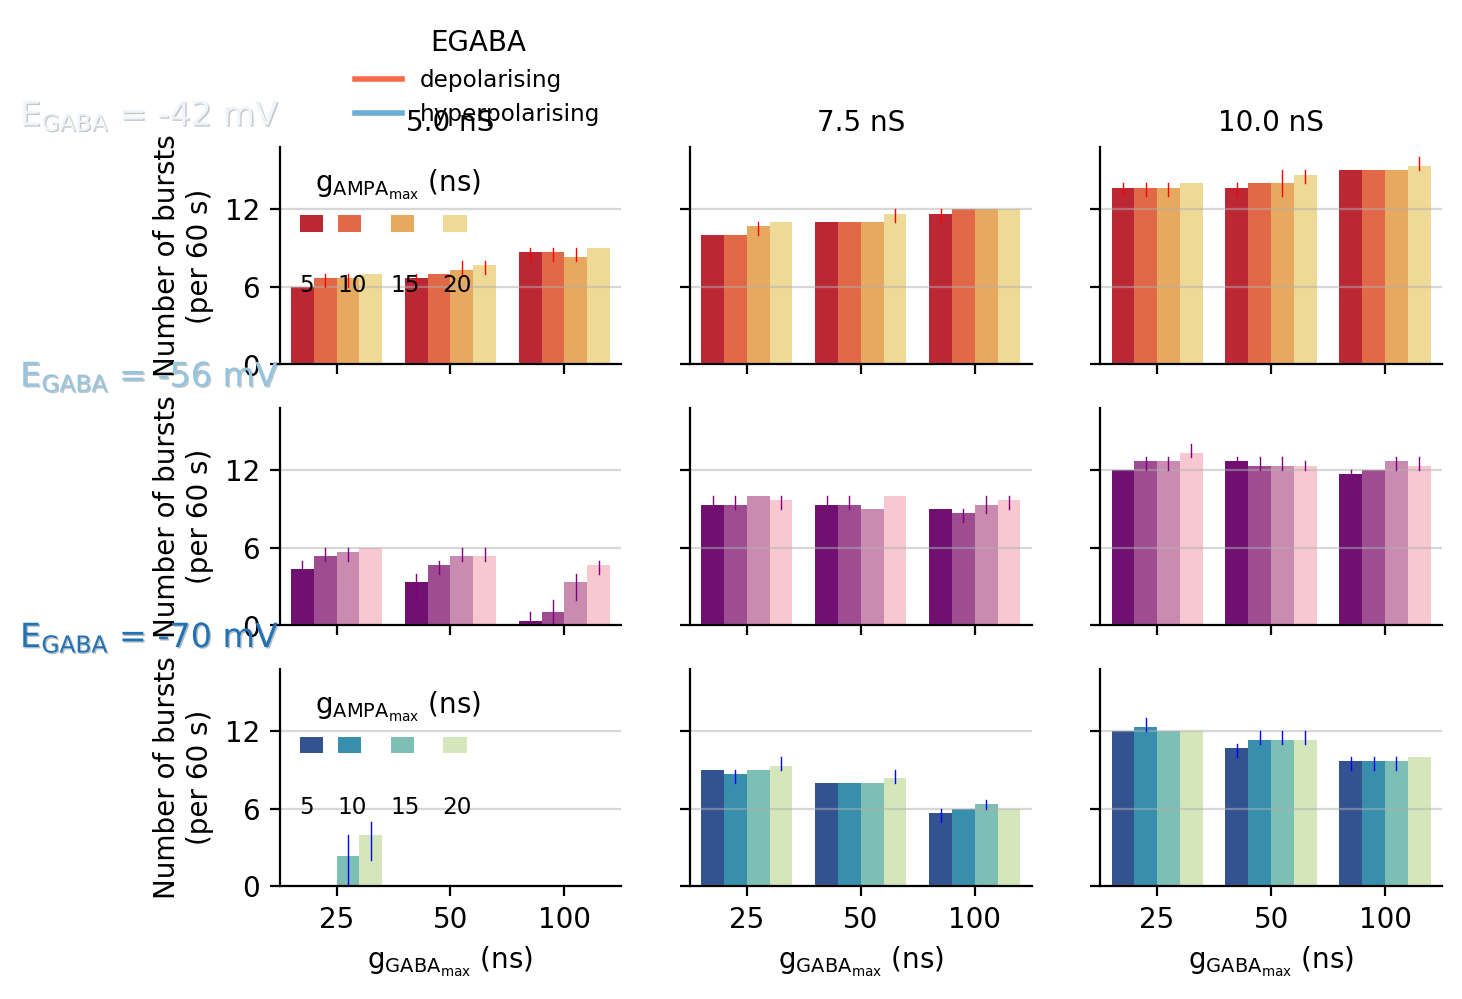

In [292]:
from scripts.lrdfigure_gampa import Params

exc_params = Params(
    gGABAs=[
        # 0,
        25,
        50,
        100,
        # 200,
    ],
    gAMPAs=np.round(np.arange(0, 20.0001, 5.0), 0),
    gNMDAs=[5.0, 7.5, 10.0],
    seeds=(
        None,
        1013,
        12987,
        #    1234, 1837
    ),
)
exc_params.run()
exc_params.process()
exc_params.plot(egabas=[-42, -56, -70])

if SAVE_FIGS:
    exc_params.save_figure(**save_args)
